 ##Part 1: Discrete Random Variables

In [84]:
import random
import matplotlib.pyplot as plt
import numpy as np
import copy
import csv
from itertools import islice

### 1.1 Coupon Collector’s Problem

In [5]:

def FairCoinToss():
    if random.uniform(0,1)<0.5: return "H"
    else: return "T"
    

def EightSidedDieRolling():
    Dice={
    "HHH":8,
    "HHT":1,
    "HTT":2,
    "HTH":3,
    "THH":4,
    "THT":5,
    "TTT":6,
    "TTH":7
    
}
    result=""
    for i in range(3):
        
        result+=FairCoinToss()
    return Dice[result]

    

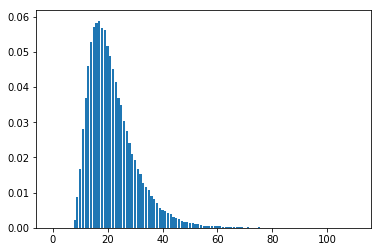

average is  21.77523


In [195]:
#A)
mylist=[]
for i in range(100000):
    Set = set()
    n=0
    while len(Set)!=8:
        n+=1
        Set.add(EightSidedDieRolling())
    mylist.append(n)
#B)    
Dict={key:0 for key in range(max(mylist)+1)}
for n in mylist:
    Dict[n]+=1
#     if n in Dict:
#          Dict[n]+=1
#     else:
#         Dict.update({n: 1})
    

D = {k:v/100000 for (k,v) in Dict.items()}
#C)
x = range(max(D.keys())+1)
y = [D[key] for key in x]
# print(len(mylist))
# print(len(D))
# print(max(mylist)+1)
# print(max(D.keys())+1)
plt.bar(x,y)


plt.show()

#x=20 has the biggest probability

#D)
list=[]
for i in range(100000):
    Set = set()
    n=0
    while len(Set)!=8:
        n+=1
        Set.add(EightSidedDieRolling())
    list.append(n)

total=0
Average=0
for i in range(100000):  
    total+=list[i]
    Average=total/100000

print("average is ",Average)  

 
 #8 (log 8 + γ) + 1/2= 21.7532576526


#1.2 monty hall problem

A) It is better to switch the answer. There are two cases: first choice is correct p=(1/3) or the first choice is a in
    incorrect(2/3). whereas the host open the wrong one already, if we switch we must win based on the situation that 
    the first choice is in correct, and the probability is 2/3. if we insist we can only win in the sitatuation where 
    our first choice was correct(p=1/3).

In [7]:
#B)
#Monty = np.empty(3, dtype=object)
def MontyHallProblem(alpha):
    Monty=np.zeros(3)
#inclusive

    Prize_index=random.randint(0,2)
   
    Monty[Prize_index]=1
    #print(Monty)
    Pick=random.randint(0,2)
    
    
    if Pick==Prize_index:
        sample=[]
    
        for n in range(len(Monty)):
            if(n!=Prize_index):
                sample.append(n)

       # print("choose one to open",sample)

        openedDoorIdx=choose1(sample)
        sample2=[]
        for n in range(len(Monty)):
            if(n!=openedDoorIdx):
                sample2.append(n)
      #  print("choice left to audiance",sample2)
        openedDoorIndex2=choose1(sample2)
    
        if insist(alpha):
            Pick2=Pick
        else: 
            Pick2=np.squeeze(sample2.remove(Pick))
            
        return"win"if (Pick2==Prize_index) else "lose"
        
    else:
       
        choiceleft=[Pick,Prize_index]
        if insist(alpha):
            Pick2=Pick
        else: 
            Pick2=Prize_index
            
        return"win"if (Pick2==Prize_index) else "lose"
          
        
    
def choose1(sample):
     if random.uniform(0,1)<0.5:
        return sample[0]
     else: 
        return sample[1]

def insist(alpha):
    if random.uniform(0,1)<alpha: return 1
    else: return 0
print(MontyHallProblem(0.5))     

win


In [8]:
# name = input("What is your name? ")
# print ("Hello, %s." % name)

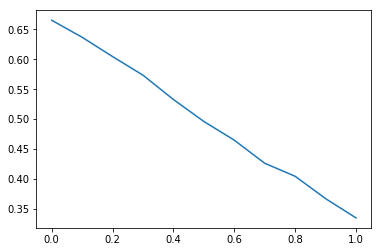

In [9]:
#C
k=0
n=0
dict={}

for k in np.arange(0,1.01,0.1):
    n=0
    for num in range(10000):
        result=MontyHallProblem(k)
        if result=="win":
            n+=1
    dict[k]=n/10000
lists = sorted(dict.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()

#when alpha is 0 that means we are 100percent switiching then we have a winning sign with 0.66
#when alpha is 1 that means we are 100percent switching then we have a probability of win with 0.33

   

In [10]:
#1.3 Birthday Paradox Problem
#A)
#n=1,0 P(X = ”1”) = 0   n=366 which P(X = ”1”) = 1

#B)

# P(X = ”1”) for n = 2     p=365/365^2=1/365

#C)
def BirthdayParadox(size):
    dupeCount = 0
    birthday = []
    for i in range(size):
        newBDay = random.randrange(365)
        birthday.append(newBDay)

    foundDupe = False
    for num in birthday:
        if birthday.count(num) > 1:
            return "1"
    return "0" 
       
       




0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

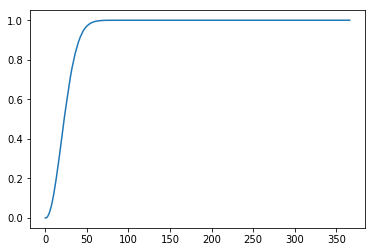

In [137]:
#D)
numTrials = 100000
arr=np.zeros(367)
for n in range(367):
    print(n)
    for trial in range(numTrials):
        if n==0:
            break
        if BirthdayParadox(n)=="1":
            arr[n]+=1
            
arr/=100000

plt.plot(arr)
plt.show()



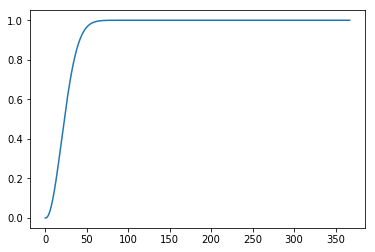

In [168]:
#E)
plt.figure(5)
x=np.arange(368)
plt.plot(x, 1-np.exp((-x*(x-1))/730))


#### Part 2: Discrete Conditional Probabilities


In [56]:
#A)
H1=("H",1)
H5=("H",5)
T1=("T",1)
T5=("T",5)




def foursideddie():
    if random.uniform(0,1)<0.5: 
        if random.uniform(0,1)<0.5: return 1
        
        else:return 2
    
    else: 
        if random.uniform(0,1)<0.5:
            return 3
        else: return 4
    
def BiasedCoinToss(alpha):
    if random.uniform(0,1)<alpha: return "H"
    else: return "T"    


def CoinTossDieRolling(alpha):  
    if BiasedCoinToss(alpha)=="H":
        return ("H",foursideddie())
    else: 
        return ("T", EightSidedDieRolling())
#BC)
def experiment(alpha):
    print("when alphas is ",alpha)
    nH=0
    nH1=0
    
    for i in range(10000):
        result = CoinTossDieRolling(alpha)        
        if result[0]=="H":
            nH+=1
        if result== H1:
            nH1+=1
    p1H=nH1/nH   
    print("P(”1”|”H”)",p1H)

    #theoretical value p(1|"H")=p(1 and "H"))/P("H")=1/8/1/2=1/4


    #D) Repeat part C for P(”5”|”H”), P(”1”|”T”), and P(”5”|”T”). Report the results.
    nH=0
    nH5=0
    for i in range(10000):
        result = CoinTossDieRolling(alpha)        
        if result[0]=="H":
            nH+=1
        if result== H5:
            nH5+=1
    p5H=nH5/nH   
    print("P(”5”|”H”)",p5H)


    nT=0
    nT1=0
    for i in range(10000):
        result = CoinTossDieRolling(alpha)        
        if result[0]=="T":
            nT+=1
        if result==T1:
            nT1+=1
    p1T=nT1/nT   
    print("P(”1”|”T”)",p1T)



    nT=0
    nT5=0
    for i in range(10000):
        result = CoinTossDieRolling(alpha)        
        if result[0]=="T":
            nT+=1
        if result==T5:
            nT5+=1
    p5T=nT5/nT   
    print("P(”5”|”T”)",p5T)

    #E Repeat part C for P(”H”|”5”), P(”T”|”5”), P(”T”|”1”), and P(”H”|”1”). Report the results.

    n5=0
    nH5=0
    for i in range(10000):
        result = CoinTossDieRolling(alpha)        
        if result[1]==5:
            n5+=1
        if result==H5:
            nH5+=1
    p5H=nH5/n5   
    print("P(”H”|”5”)",p5H)

    n5=0
    nT5=0

    for i in range(10000):
        result = CoinTossDieRolling(alpha)        
        if result[1]==5:
            n5+=1
        if result==T5:
            nT5+=1
    p5T=nT5/n5   
    print("P(”T”|”5”)",p5T)

    n1=0
    nT1=0

    for i in range(10000):
        result = CoinTossDieRolling(alpha)        
        if result[1]==1:
            n1+=1
        if result==T1:
            nT1+=1
    p1H=nH1/n1   
    print("P(”T”|”1”)",p1H)



    n1=0
    nH1=0

    for i in range(10000):
        result = CoinTossDieRolling(alpha)        
        if result[1]==1:
            n1+=1
        if result==T1:
            nH1+=1
    p1H=nH1/n1   
    print("P(”H”|”1”)",p1H,"\n")

experiment(0.5)
experiment(0.25)
experiment(0.75)





when alphas is  0.5
P(”1”|”H”) 0.2572
P(”5”|”H”) 0.0
P(”1”|”T”) 0.12907689266653488
P(”5”|”T”) 0.12065850230877334
P(”H”|”5”) 0.0
P(”T”|”5”) 1.0
P(”T”|”1”) 0.6847710330138446
P(”H”|”1”) 0.3435155412647374 

when alphas is  0.25
P(”1”|”H”) 0.2532102728731942
P(”5”|”H”) 0.0
P(”1”|”T”) 0.12294094013660105
P(”5”|”T”) 0.12171229200214707
P(”H”|”5”) 0.0
P(”T”|”5”) 1.0
P(”T”|”1”) 0.4021669853409815
P(”H”|”1”) 0.573055028462998 

when alphas is  0.75
P(”1”|”H”) 0.24797449860539247
P(”5”|”H”) 0.0
P(”1”|”T”) 0.13433425523508494
P(”5”|”T”) 0.11767084512737566
P(”H”|”5”) 0.0
P(”T”|”5”) 1.0
P(”T”|”1”) 0.8643518518518518
P(”H”|”1”) 0.15020670647680295 



In [201]:
with open('PregnancyData.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    print(row_count)
    numN=0
    numP=0
    PP=0
    NN=0
    for row in reader:
        if row[1]=="N":
            numN+=1
            if row[2]=='-':
                NN+=1
                
        else:
            numP+=1
            if row[2]=='+':
                PP+=1
    print(numP,PP)        
    α=PP/numP
    print("alpha is ",α)
    β=NN/numN
    print("beta is",β)
    γ =numP/row_count
    
    print("γ is",γ)
    
    
        


10000
473 433
alpha is  0.9154334038054969
beta is 0.7976277946887793
γ is 0.0473


In [185]:
#αβγ 

P_Ppre=α
P_Npre=1-α
P_Pnpre=1-β 
P_Nnpre=β
#E
P_preP= (α*γ)/((α*γ)+(1-γ)*(1-β))
P_preN= ((1-α)*γ)/(((1-α)*γ)+(1-γ)*β)
P_npreN=(β*(1-γ))/(((1-α)*γ)+(β*(1-γ)))
P_npreP=((1-β)*(1-γ))/((α*γ)+(1-γ)*(1-β))

print("P_+pre",P_Ppre)
print("P_-pre",P_Npre)
print("P_+npre",P_Pnpre)
print("P_-npre",P_Nnpre)
print("P_pre+",P_preP)
print("P_pre-",P_preN)
print("P_npre-",P_npreN)
print("P_npre+",P_npreP)


P_+pre 0.9154334038054969
P_-pre 0.08456659619450313
P_+npre 0.2023722053112207
P_-npre 0.7976277946887793
P_pre+ 0.18339686573485817
P_pre- 0.0052362874721822205
P_npre- 0.9947637125278178
P_npre+ 0.8166031342651419


In [192]:
#P(+|”P”), P(−|”P”), P(+|”N”), and P(−|”N”)
nPre=0
nPreP=0
with open('PregnancyData.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        if row[1]=="P":
            nPre+=1
        if row[1]=="P" and row[2]=="+":
            nPreP+=1
             
P_Ppre=nPreP/nPre
print("P_+pre",P_Ppre)



nPre=0
nPreN=0
with open('PregnancyData.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        if row[1]=="P":
            nPre+=1
        if row[1]=="P" and row[2]=="-":
            nPreN+=1
             
P_Npre =nPreN/nPre
print("P_-pre ",P_Npre )





nNpre=0
nNpreP=0
with open('PregnancyData.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        if row[1]=="N":
            nNpre+=1
        if row[1]=="N" and row[2]=="+":
            nNpreP+=1
             
P_Pnpre=nNpreP/nNpre
print("P_+npre",P_Pnpre)






nNpre=0
nNpreN=0
with open('PregnancyData.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        if row[1]=="N":
            nNpre+=1
        if row[1]=="N" and row[2]=="-":
            nNpreN+=1
             
P_Nnpre=nNpreN/nNpre
print("P_-npre",P_Nnpre)

# P(”P”|+), P(”P”|−), P(”N”|−), and P(”N”|−) 

nP=0
nPpreg=0

with open('PregnancyData.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        if row[2]=="+":
            nP+=1
        if row[1]=="P" and row[2]=="+":
            nPpreg+=1
             
P_preP=nPpreg/nP
print("P_pre+",P_preP)



nN=0
nNpreg=0

with open('PregnancyData.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        if row[2]=="-":
            nN+=1
        if row[1]=="P" and row[2]=="-":
            nNpreg+=1
             
P_preN=nNpreg/nN
print("P_pre-",P_preN)




nN=0
nNnpreg=0

with open('PregnancyData.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        if row[2]=="-":
            nN+=1
        if row[1]=="N" and row[2]=="-":
            nNnpreg+=1
             
P_npreN=nNnpreg/nN
print("P_npre-",P_npreN)


nP=0
nPnpreg=0

with open('PregnancyData.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        if row[2]=="+":
            nP+=1
        if row[1]=="N" and row[2]=="+":
            nPnpreg+=1
             
P_npreP=nPnpreg/nP
print("P_npre+",P_npreP)




    


P_+pre 0.9154334038054969
P_-pre  0.08456659619450317
P_+npre 0.20237220531122074
P_-npre 0.7976277946887793
P_pre+ 0.1833968657348581
P_pre- 0.005236287472182223
P_npre- 0.9947637125278178
P_npre+ 0.8166031342651419
